# Mini Projeto de Análise de Dados

um exercício completo de pandas para um miniprojeto de análise de dados.


### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

### Importação de modulos e arquivos

In [5]:
import pandas as pd

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep = ';', decimal = ',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep= ';')
serviçosprestados_df = pd.read_excel('BaseServiçosPrestados.xlsx', sep= ';')

#retirar colunas estado civel e cargo da tabela de funcionarios
funcionarios_df= funcionarios_df.drop(['Estado Civil', 'Cargo'], axis= 1)
display(funcionarios_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
5,6,Audir de Avila Goulart,23688,11844.0,4737.6,242,594.72,Operações
6,7,Zilma Guimarães,17875,8937.5,3575.0,286,813.12,Financeiro
7,8,Gil Bonder,3540,1770.0,708.0,198,769.44,Operações
8,9,Gustavo de Melo Teixeira,23512,11756.0,4702.4,242,745.92,Financeiro
9,10,Andre Campos,24857,12428.5,4971.4,264,719.04,Administrativo


### 1 - Valor Total da Folha Salarial
-> Qual foi o gasto total com salários de funcionários pela empresa?
Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários

In [29]:
#Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa?
salariobase = funcionarios_df[['Salario Base', 'Impostos', 'Beneficios', 'VT', 'VR']].sum().sum()

print('O valor total da folha salarial é:R${:.2f}'.format(salariobase))

#funcionarios_df['Salario Total'] = funcionarios_df[['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df ['VT'] + funcionarios_df['VR']

#print(sum(funcionarios_df['Salario Total'])

O valor total da folha salarial é:R$2717493.22


### 2- Qual foi o faturamento da empresa?
Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos

In [46]:
#Qual foi o faturamento da empresa?
#Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos

faturamentos_df = serviçosprestados_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on= 'ID Cliente')

faturamentos_df['Faturamento Total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']
print('Faturamento total: R${:,}'.format(sum(faturamentos_df['Faturamento Total'])))

Faturamento total: R$5,519,160


### 3- Qual o % de funcionários que já fechou algum contrato?
Sugestão: na base de serviços temos o funcionário que fechou cada serviço.
    Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.
. Na base de funcionários temos uma lista com todos os funcionários
. Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais
. Para calcular a qtde de funcionários que fecharam algum serviço, 
use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.

In [49]:
funcionarios_fecharamcontrato =len( serviçosprestados_df['ID Funcionário'].unique())
total_funcionarios =len(funcionarios_df['ID Funcionário'])


display('Percentual de funcionarios que fecharam contrato {:.2%}'.format(funcionarios_fecharamcontrato/ total_funcionarios))



'Percebtural de funcionarios que fecharam contrato 86.84%'

### 4- Calcule o total de contratos que cada área da empresa já fechou

In [53]:
contratosarea= serviçosprestados_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on = 'ID Funcionário')
qtd_contratoarea = contratosarea['Area'].value_counts()
print(qtd_contratoarea)


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


### 5- Calcule o total de funcionários por área

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


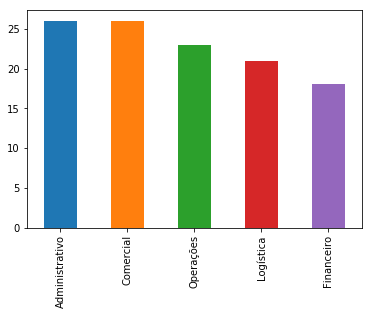

In [10]:
qtd_funcionariosarea = funcionarios_df['Area'].value_counts()
print(qtd_funcionariosarea)
qtd_funcionariosarea.plot(kind='bar')

### 6- Qual o ticket médio mensal (faturamento médio mensal) dos contratos?
Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

In [36]:
ticketmedio = clientes_df['Valor Contrato Mensal'].mean()
print('Ticket Médio mensal: R${:,.2f}'.format(ticketmedio))

Ticket Médio mensal: R$2,502.56
